In [1]:
def ln_return(price):
    price['PX_LAST+1']= pd.Series(price.PX_LAST.shift(+1))
    price_ln= np.log(price.PX_LAST) - np.log(price["PX_LAST+1"])
    price['ln_ret'] = pd.Series(price_ln)
    price.drop(price.head(1).index,inplace=True)   
    return

In [2]:
def ols(stock, market):
    global params
    global mse
    reg=pd.concat([stock["ln_ret"],market["ln_ret"]], axis=1)
    reg.columns = ['Tencent', 'HSI']
    print(reg)
    results =smf.ols("Tencent ~ HSI",data=reg).fit()
    print (results.summary())
    params=results.params
    print(results.params)
    mse =results.mse_resid
    return

In [4]:
import pandas as pd 
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

#813
#NetEase Adjusted Share Price in Estimation Window of 813
est_813_ba= pd.read_excel('est-win-813-BA.xlsx',index_col=0)
ln_return(est_813_ba)
print(est_813_ba)

#NASDAQ 
est_813_ny = pd.read_excel('est-win-813-NYSE.xlsx',index_col=0)
ln_return(est_813_ny)
print(est_813_ny)

#regression 813
ols(est_813_ba,est_813_ny)
const_813, ln_ret_813= round(params,6)
r_mse= mse**.5

print ("MSE Root=%s" %(r_mse))
print ("Return of Alibaba = %s + %s(Return of NYSE)" %(const_813,ln_ret_813))

            PX_LAST  PX_LAST+1    ln_ret
Date                                    
2018-03-13   188.41     192.74 -0.022722
2018-03-14   192.56     188.41  0.021787
2018-03-15   199.06     192.56  0.033198
2018-03-16   200.28     199.06  0.006110
2018-03-19   194.53     200.28 -0.029130
2018-03-20   198.95     194.53  0.022467
2018-03-21   195.30     198.95 -0.018517
2018-03-22   184.65     195.30 -0.056075
2018-03-23   181.20     184.65 -0.018861
2018-03-26   190.50     181.20  0.050051
2018-03-27   181.89     190.50 -0.046250
2018-03-28   178.91     181.89 -0.016519
2018-03-29   183.54     178.91  0.025550
2018-04-02   177.61     183.54 -0.032842
2018-04-03   174.67     177.61 -0.016692
2018-04-04   172.07     174.67 -0.014997
2018-04-05   172.57     172.07  0.002902
2018-04-06   167.52     172.57 -0.029700
2018-04-09   169.87     167.52  0.013931
2018-04-10   177.10     169.87  0.041681
2018-04-11   175.36     177.10 -0.009874
2018-04-12   175.92     175.36  0.003188
2018-04-13   172

In [5]:
def abret(ret,act):
    ret = pd.Series(ret["ln_ret"])
    er = const_813 + ln_ret_813 * ret
    act['ER'] = pd.Series(er)
    act["AR"]= act.ln_ret-act.ER
    act['AR Beta'] = (act["AR"]/r_mse)
    act["CAR"]= act["AR"].cumsum()
    act["CAR Beta"]= (act["CAR"]/ ((len(act)**.5)*r_mse))
    act = act.drop(act.columns[[0, 1]], axis=1)
    print (act)
    act.to_excel("output.xlsx")
    return

In [23]:
#Actual return on 813
act_813_ba= pd.read_excel('act-win-813-BA.xlsx',index_col=0)
ln_return(act_813_ba)
print(act_813_ba)

#Actual NASDAQ return on 813
act_813_ny= pd.read_excel('act-win-813-NYSE.xlsx',index_col=0)
ln_return(act_813_ny)
print(act_813_ny)

#Abnormal Return 813
abret(act_813_ny, act_813_ba)

            PX_LAST  PX_LAST+1    ln_ret
Date                                    
2018-08-13   177.68     180.01 -0.013028
2018-08-14   172.53     177.68 -0.029413
2018-08-15   169.83     172.53 -0.015773
2018-08-16   171.99     169.83  0.012638
             PX_LAST  PX_LAST+1    ln_ret
Date                                     
2018-08-13  12763.66   12843.49 -0.006235
2018-08-14  12835.31   12763.66  0.005598
2018-08-15  12723.09   12835.31 -0.008782
2018-08-16  12841.28   12723.09  0.009247
              ln_ret        ER        AR   AR Beta       CAR  CAR Beta
Date                                                                  
2018-08-13 -0.013028 -0.010697 -0.002331 -0.148325 -0.002331 -0.074163
2018-08-14 -0.029413  0.009716 -0.039129 -2.489552 -0.041460 -1.318939
2018-08-15 -0.015773 -0.015090 -0.000683 -0.043472 -0.042143 -1.340675
2018-08-16  0.012638  0.016010 -0.003372 -0.214524 -0.045515 -1.447937


In [24]:
#Actual return on 831
act_831_ba= pd.read_excel('act-win-831-BA.xlsx',index_col=0)
ln_return(act_831_ba)
print(act_831_ba)

#Actual NASDAQ return on 831
act_831_ny= pd.read_excel('act-win-831-NYSE.xlsx',index_col=0)
ln_return(act_831_ny)
print(act_831_ny)

#Abnormal Return 831
abret(act_831_ny, act_831_ba,)


            PX_LAST  PX_LAST+1    ln_ret
Date                                    
2018-08-31   175.01     174.60  0.002345
2018-09-04   170.44     175.01 -0.026460
2018-09-05   164.23     170.44 -0.037115
2018-09-06   159.87     164.23 -0.026907
             PX_LAST  PX_LAST+1    ln_ret
Date                                     
2018-08-31  13016.89   13039.93 -0.001768
2018-09-04  12969.86   13016.89 -0.003620
2018-09-05  12968.55   12969.86 -0.000101
2018-09-06  12938.91   12968.55 -0.002288
2018-09-07  12911.12   12938.91 -0.002150
              ln_ret        ER        AR   AR Beta       CAR  CAR Beta
Date                                                                  
2018-08-31  0.002345 -0.002992  0.005337  0.339576  0.005337  0.169788
2018-09-04 -0.026460 -0.006185 -0.020275 -1.289966 -0.014938 -0.475195
2018-09-05 -0.037115 -0.000115 -0.037000 -2.354112 -0.051938 -1.652251
2018-09-06 -0.026907 -0.003888 -0.023019 -1.464545 -0.074956 -2.384524


In [9]:
#Actual return on 96
act_96_ba= pd.read_excel('act-win-96-ba.xlsx',index_col=0)
ln_return(act_96_ba)
print(act_96_ba)

#Actual NASDAQ return on 831
act_96_ny= pd.read_excel('act-win-96-NYSE.xlsx',index_col=0)
ln_return(act_96_ny)
print(act_96_ny)

#Abnormal Return 831
abret(act_96_ny, act_96_ba)

            PX_LAST  PX_LAST+1    ln_ret
Date                                    
2018-09-07   162.37     159.87  0.015517
2018-09-10   156.36     162.37 -0.037717
2018-09-11   157.46     156.36  0.007010
2018-09-12   161.46     157.46  0.025086
             PX_LAST  PX_LAST+1    ln_ret
Date                                     
2018-09-07  12911.12   12938.91 -0.002150
2018-09-10  12928.67   12911.12  0.001358
2018-09-11  12952.30   12928.67  0.001826
2018-09-12  12990.10   12952.30  0.002914
              ln_ret        ER        AR   AR Beta       CAR  CAR Beta
Date                                                                  
2018-09-07  0.015517 -0.003650  0.019167  1.219475  0.019167  0.609738
2018-09-10 -0.037717  0.002402 -0.040119 -2.552541 -0.020952 -0.666533
2018-09-11  0.007010  0.003209  0.003801  0.241855 -0.017151 -0.545605
2018-09-12  0.025086  0.005086  0.020000  1.272473  0.002849  0.090631


In [11]:
#calculate AAR
aar = []
for ar in act_813_ba['AR'],act_831_ba['AR'],act_96_ba['AR']:
    ar = ar.reset_index()
    ar = ar['AR']
    aar.append(ar/3)
aar = pd.concat(aar, axis=1)
aar= aar.sum(axis=1)
print (aar)

0    0.007391
1   -0.033174
2   -0.011294
3   -0.002130
dtype: float64


In [12]:
#calculate CAAR
caar = []
for car in act_813_ba['CAR'],act_831_ba['CAR'],act_96_ba['CAR']:
    car = car.reset_index()
    car = car['CAR']
    caar.append(car/3)
caar = pd.concat(caar, axis=1)
caar= caar.sum(axis=1)
print (caar)

0    0.007391
1   -0.025783
2   -0.037077
3   -0.039208
dtype: float64


In [13]:
avg=pd.concat([aar, caar], axis=1)
avg.columns= ['AAR','CAAR']
print (avg)

        AAR      CAAR
0  0.007391  0.007391
1 -0.033174 -0.025783
2 -0.011294 -0.037077
3 -0.002130 -0.039208


In [14]:
aar_var= (r_mse*3)/(3**2)
taar = aar/aar_var
print (aar_var)
print (taar)

0.0052390868473012305
0    1.410726
1   -6.332060
2   -2.155729
3   -0.406596
dtype: float64


In [15]:
caar_var = ((4**.5)*(r_mse*3))/(3**2)
tcaar = caar/caar_var
print (tcaar)

0    0.705363
1   -2.460667
2   -3.538531
3   -3.741829
dtype: float64


In [16]:
avg=pd.concat([aar, taar, caar,tcaar], axis=1)
avg.columns= ['AAR','AAR Beta', 'CAAR', 'CAAR Beta']
print (avg)

        AAR  AAR Beta      CAAR  CAAR Beta
0  0.007391  1.410726  0.007391   0.705363
1 -0.033174 -6.332060 -0.025783  -2.460667
2 -0.011294 -2.155729 -0.037077  -3.538531
3 -0.002130 -0.406596 -0.039208  -3.741829


In [17]:
#Testing AR

#813 test
tar_813 = act_813_ba["AR"][0] / r_mse
print ("T-stat for 813 is %s" %tar_813)

#831 test
tar_831 = act_831_ba["AR"][0] / r_mse
print ("T-stat for 831 is %s" %tar_831)

#96 test
tar_96 = act_96_ba["AR"][0] / r_mse
print ("T-stat for 96 is %s" %tar_96)

T-stat for 813 is -0.14832536913533464
T-stat for 831 is 0.33957589940008853
T-stat for 96 is 1.2194754061874973


In [18]:
car = lambda act, mse: act["CAR"][-1]/ ((len(act)**.5)*mse)

In [19]:
#Test CAR
t813 = car(act_813_ba,r_mse)
print(t813)

t831=car(act_831_ba,r_mse)
print (t831)

t96=car(act_96_ba,r_mse)
print (t96)

-1.447936933711243
-2.384523832490006
0.09063134058318106


In [20]:
#tTest AAR
var= (r_mse*3)/(3**2)
taar = aar[0]/ var
print (taar)

1.4107259364522513


In [21]:
#Test CAAR
#CAAR variance:
caar_var = ((4**.5)*(r_mse*3))/(3**2)
tcaar = caar[3]/caar_var
print (caar_var)
print (tcaar)

0.010478173694602461
-3.741829425618068


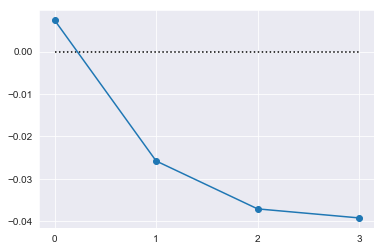

In [22]:
#caar curve
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.plot(range(4),caar,"-o")
plt.hlines(0,0,3,linestyles='dotted')
plt.xticks(np.arange(0, 4, step=1))
plt.savefig('foo.png')
plt.show()
